# Crude Oil Prediction
<hr>

In [94]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression


In [95]:
# Read data set
df = pd.read_csv("crude-oil-price.csv")
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


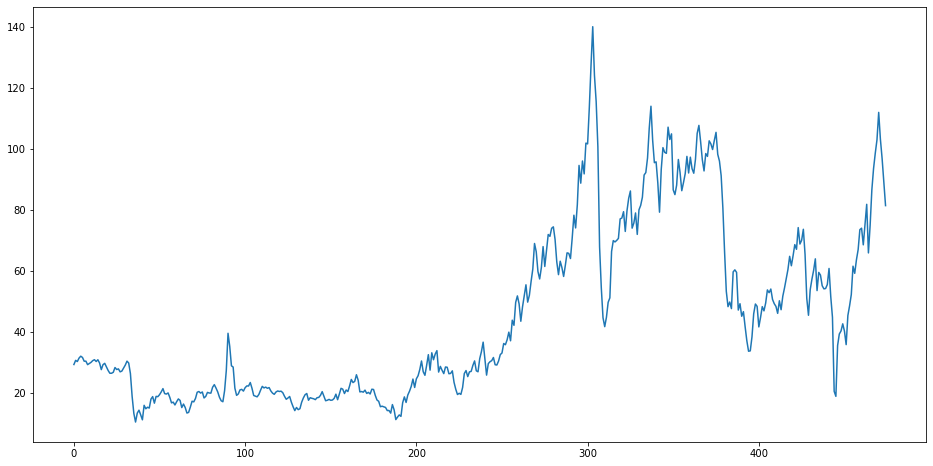

In [96]:
# Plotting
plt.figure(figsize=(16,8))
plt.plot(df["price"], label="Crude oil price")

In [97]:
# Format datetime to numeric data
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(dt.datetime.toordinal)

Text(0, 0.5, 'price')

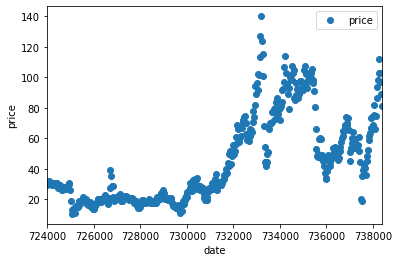

In [98]:
df.plot(x='date', y='price', style='o')
plt.ylabel('price')

In [99]:
x = df[['date']]
y = df['price']

In [100]:
# Train model
lrm = LinearRegression()
lrm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

`y = mx + c`

In [101]:
# c
lrm.intercept_

-3506.9070157753968

In [102]:
# m
lrm.coef_

array([0.00485735])

In [107]:
predictions = lrm.predict(x)

Text(0, 0.5, 'price')

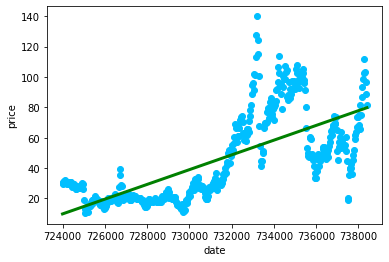

In [117]:
# Plotting with Linear regression
plt.scatter(x, y, color='deepskyblue')
plt.plot(x, predictions, color='green', linewidth='3')
plt.xlabel('date')
plt.ylabel('price')